https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html#sklearn.neural_network.MLPClassifier.predict_proba

### import dependencies

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

### train model

In [2]:
df = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

# features
X_train = df.iloc[:, 1:]
y_train = df.iloc[:, 0]

X_train = X_train.values
y_train = y_train.values

X_test = df_test.iloc[:, 1:]
y_test = df_test.iloc[:, 0]

X_test = X_test.values
y_test = y_test.values

display(df.head())
print(X_train.shape)

,5,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,...,0.608,0.609,0.610,0.611,0.612,0.613,0.614,0.615,0.616,0.617
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


(59999, 784)


### fit model

In [3]:
model = MLPClassifier(
    activation="relu",
    solver="adam",
    alpha=0.0001,
    hidden_layer_sizes=(50, 50, 50),
    learning_rate="constant",
    random_state=1, 
    max_iter=100, 
    verbose=True
)
model.fit(X_train, y_train)

Iteration 1, loss = 2.42186546
Iteration 2, loss = 0.51157860
Iteration 3, loss = 0.35610405
Iteration 4, loss = 0.28354064
Iteration 5, loss = 0.23894830
Iteration 6, loss = 0.20745889
Iteration 7, loss = 0.18619910
Iteration 8, loss = 0.16766521
Iteration 9, loss = 0.15204572
Iteration 10, loss = 0.13985336
Iteration 11, loss = 0.12845942
Iteration 12, loss = 0.12510924
Iteration 13, loss = 0.11237064
Iteration 14, loss = 0.10808025
Iteration 15, loss = 0.10603741
Iteration 16, loss = 0.09822191
Iteration 17, loss = 0.09117498
Iteration 18, loss = 0.08903323
Iteration 19, loss = 0.08911433
Iteration 20, loss = 0.08439092
Iteration 21, loss = 0.07892599
Iteration 22, loss = 0.07491522
Iteration 23, loss = 0.07273684
Iteration 24, loss = 0.06659993
Iteration 25, loss = 0.06965796
Iteration 26, loss = 0.05958163
Iteration 27, loss = 0.06166039
Iteration 28, loss = 0.05712754
Iteration 29, loss = 0.05818273
Iteration 30, loss = 0.05200018
Iteration 31, loss = 0.05006006
Iteration 32, los

/opt/apps/software/lang/Anaconda3/2024.02-1/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(hidden_layer_sizes=(50, 50, 50), max_iter=100, random_state=1,
              verbose=True)

### search for better hyperparameters

In [4]:
# parameter_space = {
#     'hidden_layer_sizes': [(50,50,50), (50,100,50), (100,)],
#     'activation': ['tanh', 'relu'],
#     'solver': ['sgd', 'adam'],
#     'alpha': [0.0001, 0.05],
#     'learning_rate': ['constant','adaptive'],
# }
# 
# clf = GridSearchCV(model, parameter_space, n_jobs=-1, cv=3)
# clf.fit(X_train, y_train)
# 
# # Best paramete set
# print('Best parameters found:\n', clf.best_params_)
# 
# # All results
# means = clf.cv_results_['mean_test_score']
# stds = clf.cv_results_['std_test_score']
# for mean, std, params in zip(means, stds, clf.cv_results_['params']):
#     print("%0.3f (+/-%0.03f) for %r" % (mean, std * 2, params))
# 
# y_true, y_pred = y_test , clf.predict(X_test)
# 
# print('Results on the test set:')
# print(classification_report(y_true, y_pred))

### loss over epochs chart

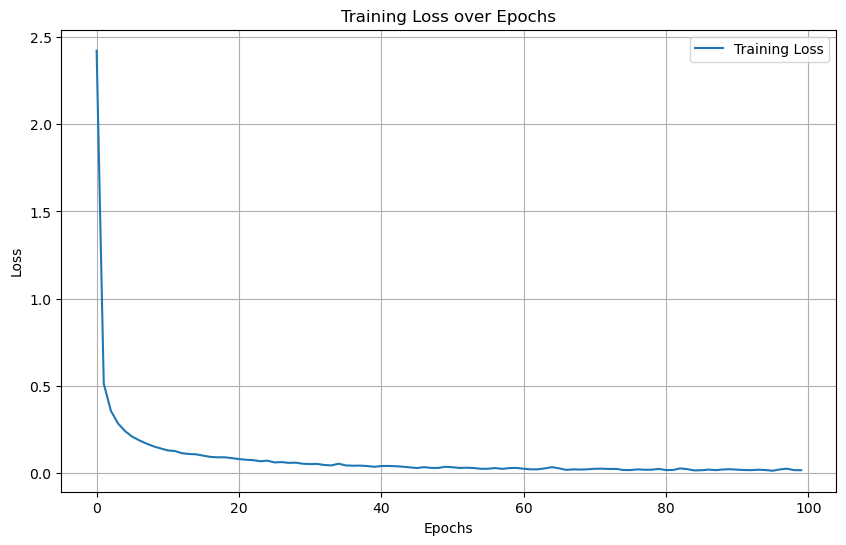

In [5]:
plt.figure(figsize=(10, 6))
plt.plot(model.loss_curve_, label='Training Loss')
plt.title('Training Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.grid()
plt.legend()
plt.show()

### predictions

In [6]:
y_pred = model.predict(X_test)
print(y_pred)

y_pred_proba = model.predict_proba(X_test)
print(y_pred_proba)

[2 1 0 ... 4 5 6]
[[5.54437810e-60 1.79983112e-26 1.00000000e+00 ... 1.06887206e-41
  1.06462448e-46 1.20406656e-33]
 [1.60163684e-19 9.99999999e-01 1.44258367e-15 ... 1.20160703e-10
  6.91538355e-10 6.51295180e-18]
 [1.00000000e+00 3.53235122e-24 3.16623400e-26 ... 1.13668707e-24
  8.00456265e-35 5.72967756e-22]
 ...
 [1.72358728e-54 4.29365409e-24 5.26307035e-46 ... 2.34348580e-36
  1.95761145e-25 2.26747800e-19]
 [1.90329120e-41 1.30541655e-31 3.80148809e-42 ... 4.62827640e-42
  8.70509754e-22 1.83125129e-18]
 [2.78450219e-21 3.57668761e-66 3.66850545e-40 ... 4.14076643e-71
  4.72775744e-32 1.23683965e-55]]


### score

In [10]:
print("Training set score: %f" % model.score(X_train, y_train))
print("Test set score: %f" % model.score(X_test, y_test))

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print("Accuracy: %f" % accuracy)
print("Precision: %f" % precision)
print("Recall: %f" % recall)
print("F1 Score: %f" % f1)

print(classification_report(y_test, y_pred))

Training set score: 0.996633
Test set score: 0.964896
Accuracy: 0.964896
Precision: 0.965117
Recall: 0.964896
F1 Score: 0.964883
              precision    recall  f1-score   support

           0       0.96      0.99      0.98       980
           1       0.99      0.99      0.99      1135
           2       0.97      0.96      0.96      1032
           3       0.97      0.95      0.96      1010
           4       0.98      0.96      0.97       982
           5       0.92      0.97      0.95       892
           6       0.97      0.97      0.97       958
           7       0.96      0.97      0.97      1027
           8       0.96      0.94      0.95       974
           9       0.97      0.95      0.96      1009

    accuracy                           0.96      9999
   macro avg       0.96      0.96      0.96      9999
weighted avg       0.97      0.96      0.96      9999

